In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data = pd.read_csv('/content/bike_sharing.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data = data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [ ]:
data = data.drop(columns = ['instant' , 'dteday' , 'year'])

In [ ]:
cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

In [ ]:
df_oh = data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data



for col in cols:
    df_oh = one_hot_encoding(df_oh, col)

In [ ]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)

In [ ]:
X

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
17375,0.26,0.60,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
17376,0.26,0.60,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
17377,0.26,0.56,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
y = df_oh['count']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
y_test


12830    425
8688      88
7091       4
12230    526
431       13
        ... 
4731      21
15987    181
10347     88
4111      14
11971    148
Name: count, Length: 4345, dtype: int64

In [ ]:
error = y_test - y_pred

Text(0, 0.5, 'Error')

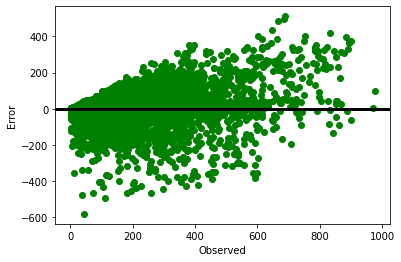

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, error ,color = 'green')
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

102.2971472188444

In [ ]:
r2_score = regressor.score(X_test, y_test)
print(r2_score*100,'%')

67.45878184066154 %
